In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"/Users/sabhyalokhande/Desktop/ML/uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
print(df['pickup_datetime'].dtypes)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
print(df['pickup_datetime'].dtypes)

0    2015-05-07 19:52:06 UTC
1    2009-07-17 20:04:56 UTC
2    2009-08-24 21:45:00 UTC
3    2009-06-26 08:22:21 UTC
4    2014-08-28 17:47:00 UTC
Name: pickup_datetime, dtype: object
object
0   2015-05-07 19:52:06+00:00
1   2009-07-17 20:04:56+00:00
2   2009-08-24 21:45:00+00:00
3   2009-06-26 08:22:21+00:00
4   2014-08-28 17:47:00+00:00
Name: pickup_datetime, dtype: datetime64[ns, UTC]
datetime64[ns, UTC]


In [7]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek

In [8]:
df = df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])

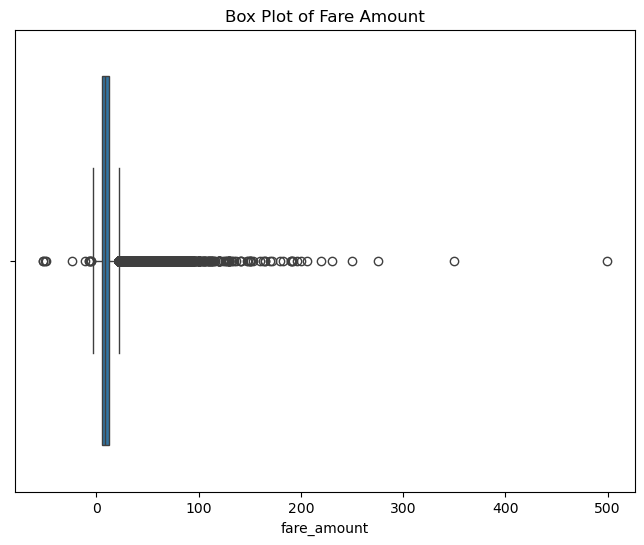

In [9]:
plt.figure(figsize=(8, 6))# width 8 height 6 inches
sns.boxplot(data=df, x='fare_amount')
plt.title('Box Plot of Fare Amount')
plt.show()

In [10]:
def remove_outliers(data, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

df = remove_outliers(df, 'fare_amount')

print("Dataset shape after outlier removal:", df.shape)

Dataset shape after outlier removal: (182833, 8)


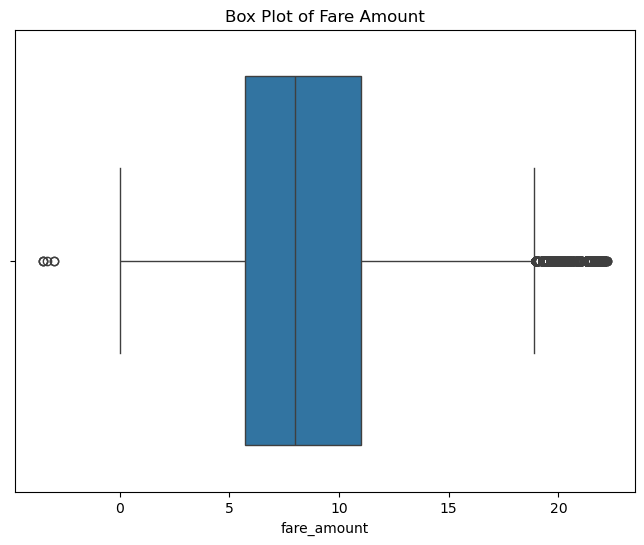

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='fare_amount')
plt.title('Box Plot of Fare Amount')
plt.show()

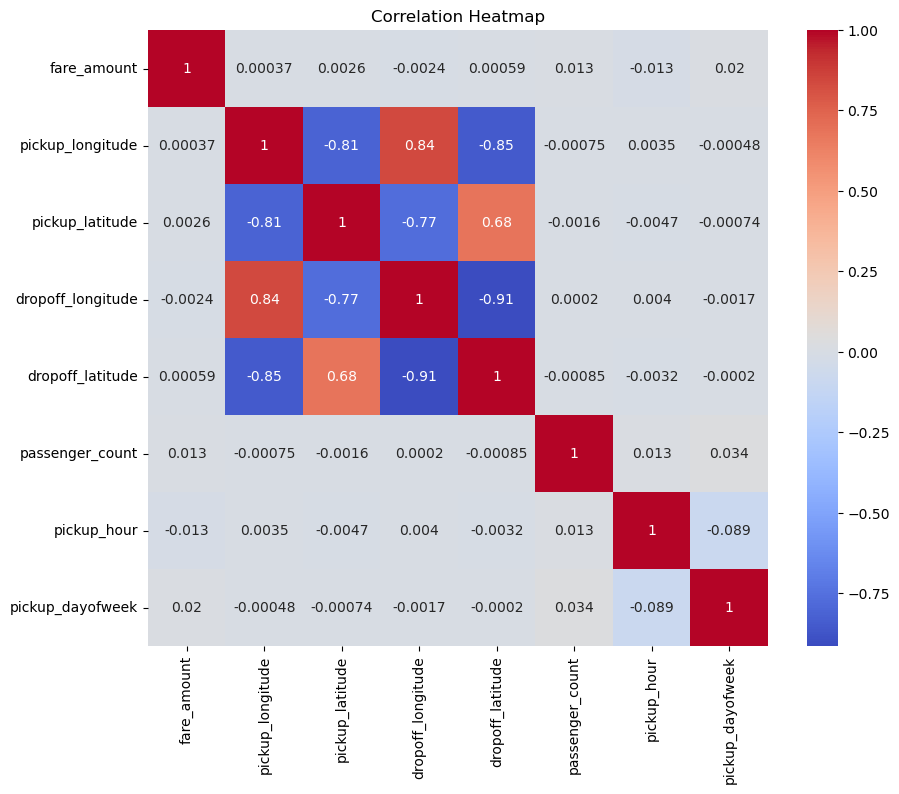

In [11]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
x=df.drop(columns=['fare_amount'])
y=df['fare_amount']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
models={
    "Linear Regression":LinearRegression(),
    "Ridge Regression":Ridge(alpha=1.0),
    "Lasso Regression":Lasso(alpha=0.001, max_iter=10000)
}

results = []

for name, model in models.items():
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    r2=r2_score(y_test,predict)
    rmse=np.sqrt(mean_squared_error(y_test, predict))
    mae=mean_absolute_error(y_test, predict)
    results.append([name,r2,rmse,mae])

results_df = pd.DataFrame(results, columns=["Model", "R2", "RMSE","MAE"])
results_df

,Model,R2,RMSE,MAE
0,Linear Regression,0.000146,4.136494,3.281793
1,Ridge Regression,0.000146,4.136494,3.281793
2,Lasso Regression,0.000147,4.136491,3.281791
